### Lecture 5 - Model Tuning

In this example, we will use the Iris dataset to tune a **Support Vector Classifier** to predict flower type from sepal and petal data

A **Support Vector Classifier (SVC)** is a type of classifier that has 3 hyperparameters

- **Kernal** is a function that transforms low dimensional data into high dimensional data to enhance separation
- **C** is a regularization hyperparameter to prevent overfitting
- **Gamma** is a decision boundary hyperparameter that determines how much influence points will have based on their distance from a decision boundary

In [12]:
# common libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC  
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('always')

### Load and explore iris data

In [2]:
# load iris data
irisdata = pd.read_csv('iris.csv')

In [3]:
# view top 5 rows
irisdata.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\steve\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\steve\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


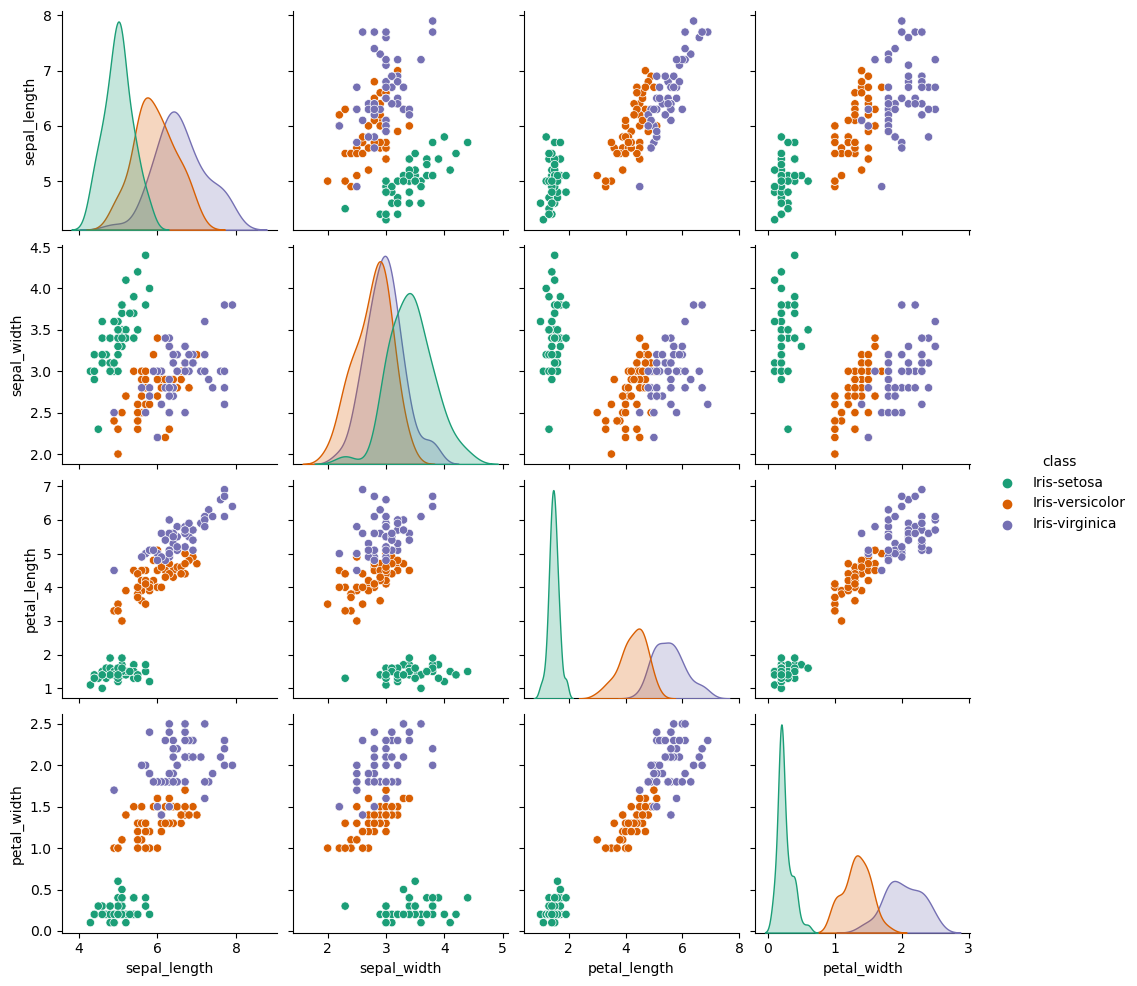

In [4]:
# view pairwise distributions
sns.pairplot(irisdata, hue='class', palette='Dark2')
plt.show()

### Prepare iris data for model training

In [5]:
# drop the class column from irisdata... these will be the training features 
X = irisdata.drop('class', axis=1)  

# select the class column from irisdata... these will be the class labels for training
y = irisdata['class']

# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Using GridSearch

GridSearch uses a defined parameter grid and performs an exhaustive search for the best hyperparameters in the set 

This can take some time since it performs complete cross validation on each set of hyperparameters

In [ ]:
# import gridsearch library
from sklearn.model_selection import GridSearchCV

In [6]:
# define parameter grid to search hyperparameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [7]:
# define grid search using SVC model and parameter grid
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

# train model using each parameter
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [8]:
# show the best hyperparameters
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.1, kernel='poly')


In [9]:
# view the classification report
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



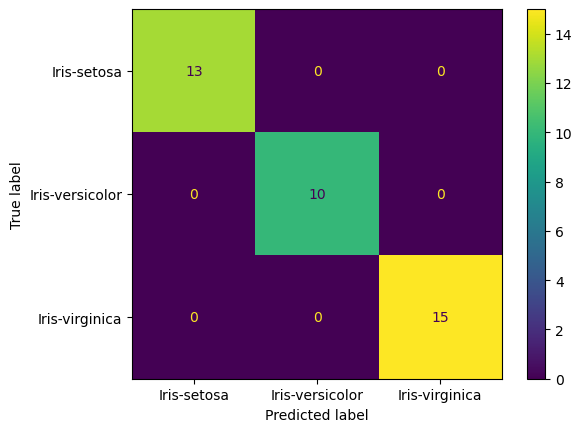

In [10]:
# view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)
plt.show()

### Random Search

faster than grid search because it doesn't search the entire set of combinations

In [ ]:
# import random search library
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define parameter grid to search hyperparameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [19]:
# define randomized search using SVC model and parameter grid
search = RandomizedSearchCV(SVC(), param_grid, n_iter=20, scoring='accuracy', n_jobs=-1, random_state=1)

In [ ]:
# execute search
result = search.fit(X_train,y_train)

In [20]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9818181818181818
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


In [21]:
# view the classification report
search_predictions = search.predict(X_test)
print(classification_report(y_test,search_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



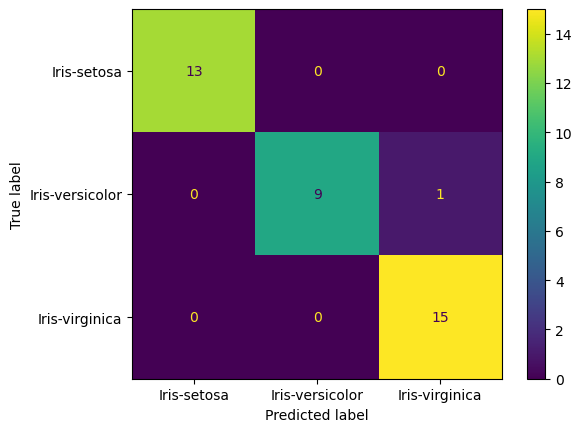

In [22]:
# view the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, search_predictions)
plt.show()